In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px


In [4]:
df = pd.read_csv('../data/Domestic violence.csv')

- SL. No: Número de série do registro.
- Age: Idade do respondente
- Education: Nível educacional do respondente (tertiary for higher secondary)
- Employment: Situação de emprego do respondente.
- Income: Nível de renda do respondente (0 indicando nenhuma renda).
- Marital status: Estado civil do respondente (casado ou solteiro).
- Violence: Indica se o respondente sofreu violência doméstica (sim ou não).

In [5]:
df.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


In [6]:
df.columns

Index(['SL. No', 'Age', 'Education ', 'Employment ', 'Income',
       'Marital status ', 'Violence '],
      dtype='object')

In [7]:
# Removendo espaços vazios nas colunas Education,Employment,Maritial status e Violence

df.columns = [col.strip() for col in df.columns]

In [8]:
df = df.drop(columns=['SL. No'])

In [9]:
df.head()

,Age,Education,Employment,Income,Marital status,Violence
0,30,secondary,unemployed,0,married,yes
1,47,tertiary,unemployed,0,married,no
2,24,tertiary,unemployed,0,unmarred,no
3,22,tertiary,unemployed,0,unmarred,no
4,50,primary,unemployed,0,married,yes


In [10]:
df.describe()

,Age,Income
count,347.000000,347.000000
mean,31.380403,2110.685879
std,9.601569,5743.278766
min,15.000000,0.000000
25%,23.000000,0.000000
50%,30.000000,0.000000
75%,39.500000,0.000000
max,60.000000,35000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             347 non-null    int64 
 1   Education       347 non-null    object
 2   Employment      347 non-null    object
 3   Income          347 non-null    int64 
 4   Marital status  347 non-null    object
 5   Violence        347 non-null    object
dtypes: int64(2), object(4)
memory usage: 16.4+ KB


# Análise das Variáveis (Atributos)

### Age = Idade

In [12]:
df['Age'].value_counts().sort_index()

Age
15     2
17     1
18     9
19    14
20    13
21    12
22    17
23    20
24    12
25    21
26    15
27    13
28    10
29    12
30    25
31     6
32     5
33    15
34     5
35    15
36     8
37     3
38     4
39     3
40    17
41     1
42     7
43     7
44    11
45    13
46     4
47     5
48     2
50    13
51     2
54     1
55     2
56     1
60     1
Name: count, dtype: int64

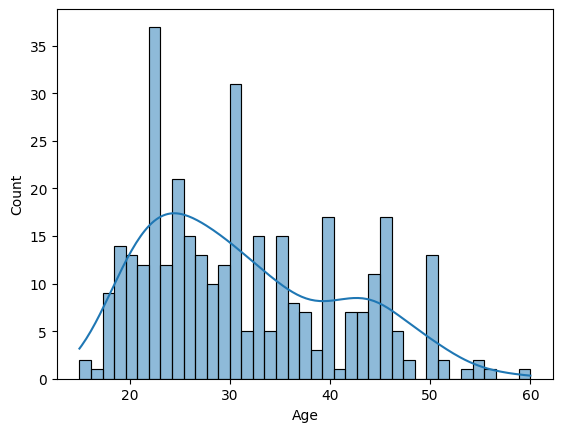

In [13]:
sns.histplot(df, x='Age',  bins=len(df['Age'].unique()), kde=True, stat='count');

### Education = Educação

In [14]:
df['Education'].value_counts()

Education
primary      132
secondary    114
none          52
tertiary      49
Name: count, dtype: int64

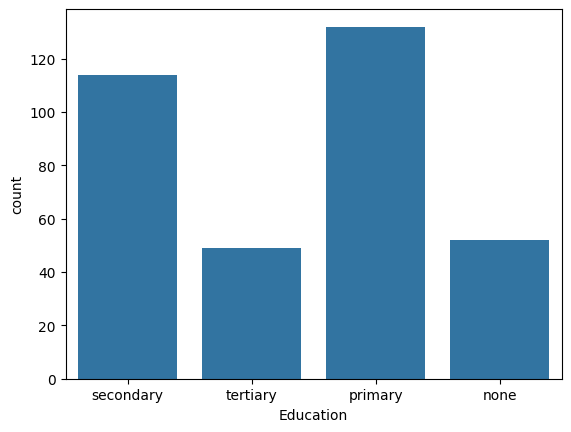

In [15]:
sns.countplot(x='Education', data=df);

### Employment = Emprego

In [16]:
df['Employment'].value_counts()

Employment
unemployed       274
semi employed     47
employed          23
employed           3
Name: count, dtype: int64

In [17]:
df['Employment'].unique()

array(['unemployed', 'semi employed', 'employed', 'employed '],
      dtype=object)

In [18]:
#Removendo espaços vazios em todos os valoros da coluna Employment

df['Employment'] = df['Employment'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [19]:
df['Employment'].unique()

array(['unemployed', 'semi employed', 'employed'], dtype=object)

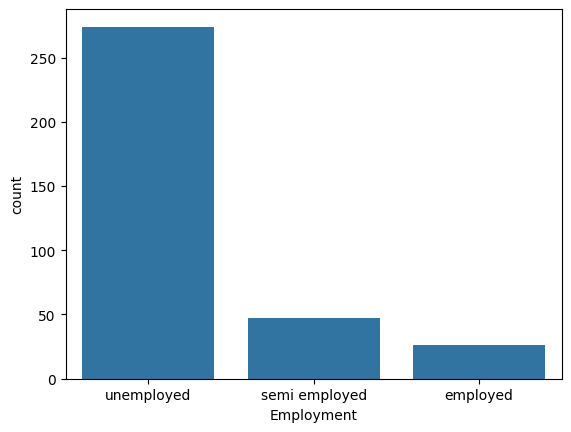

In [20]:
sns.countplot(x='Employment', data=df);

### Income = Renda Anual

In [21]:
df['Income'].value_counts().sort_index()

Income
0        272
8          1
1000       2
1200       1
1500       1
2000       5
2200       1
2500       4
3000       6
3500       3
4000       4
5000       8
5500       2
6000       4
7000       2
8000       3
9000       1
10000      4
12000      2
15000      4
18000      1
20000      1
22000      5
24000      3
25000      3
27000      1
28000      1
30000      1
35000      1
Name: count, dtype: int64

<Axes: xlabel='Income', ylabel='Count'>

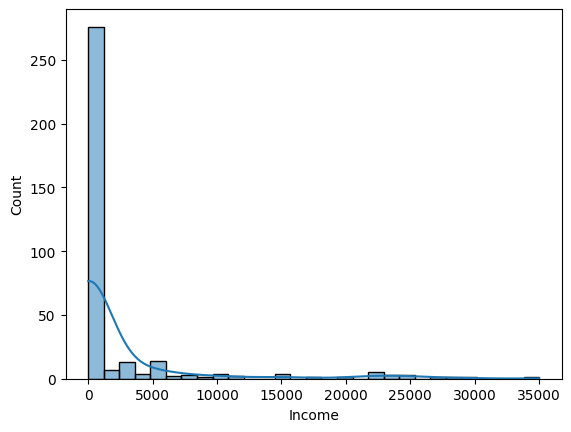

In [22]:
sns.histplot(df, x='Income', bins=len(df['Income'].unique()), kde=True, stat='count')

### Marital Status = Estado civil

In [23]:
df['Marital status'].value_counts()

Marital status
married     300
unmarred     47
Name: count, dtype: int64

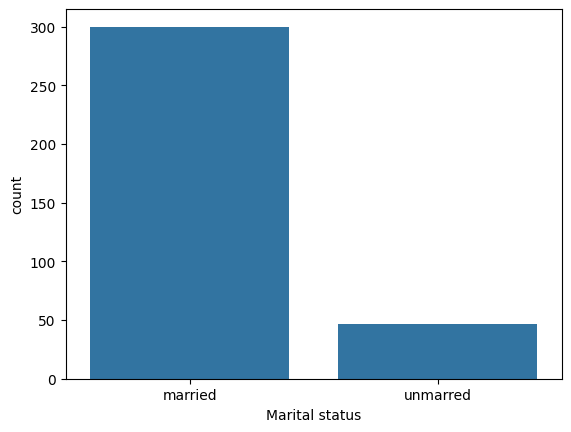

In [24]:
sns.countplot(x='Marital status', data=df);

### Violence = Violencia 

In [25]:
df['Violence'].value_counts()

Violence
no     261
yes     86
Name: count, dtype: int64

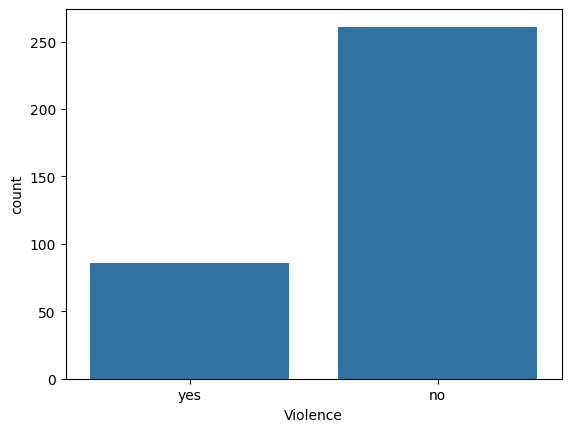

In [26]:
sns.countplot(x='Violence', data=df);

### Checando valores faltantes (NaN)

In [27]:
df.isnull().sum()

Age               0
Education         0
Employment        0
Income            0
Marital status    0
Violence          0
dtype: int64

### Análise Estatíscas Descritivas

In [28]:
df.describe()

,Age,Income
count,347.000000,347.000000
mean,31.380403,2110.685879
std,9.601569,5743.278766
min,15.000000,0.000000
25%,23.000000,0.000000
50%,30.000000,0.000000
75%,39.500000,0.000000
max,60.000000,35000.000000


In [29]:
df.mode()

,Age,Education,Employment,Income,Marital status,Violence
0,30,primary,unemployed,0,married,no


- Média, moda e mediana estão muito proximas indicando a tendência a uma distribuição normal

### Análise de Outliers

In [30]:
#Idade
px.box(df, y='Age')

In [31]:
#Renda anual
px.box(df, y='Income')

### Salvando (Exportando) o Dataframe Tratado

In [32]:
 # df.to_csv('df_tratado.csv', sep=';', encoding='utf-8', index=False)